# Lag, ACF and PACF  hands on

## importing required libraries

In [ ]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from   IPython.display                 import  display
from   pylab                           import  rcParams 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Lag Plot

In [ ]:
df = pd.read_excel('StockPrice.xlsx')

In [ ]:
df.head()

,Year,Month,Price
0,1981,Jan,67.267076
1,1981,Feb,65.864130
2,1981,Mar,70.804041
3,1981,Apr,72.375145
4,1981,May,70.605226


In [ ]:
df.tail()

,Year,Month,Price
151,1993,Aug,255.422727
152,1993,Sep,252.513636
153,1993,Oct,267.576190
154,1993,Nov,270.847619
155,1993,Dec,286.342857


In [ ]:
date=pd.date_range(start="01/01/1981",end="31/12/1993",freq='M')
date

DatetimeIndex(['1981-01-31', '1981-02-28', '1981-03-31', '1981-04-30',
               '1981-05-31', '1981-06-30', '1981-07-31', '1981-08-31',
               '1981-09-30', '1981-10-31',
               ...
               '1993-03-31', '1993-04-30', '1993-05-31', '1993-06-30',
               '1993-07-31', '1993-08-31', '1993-09-30', '1993-10-31',
               '1993-11-30', '1993-12-31'],
              dtype='datetime64[ns]', length=156, freq='M')

In [ ]:
df['Month']=date
df=df.drop('Year',axis=1)
df=df.set_index('Month')

<AxesSubplot:xlabel='Month'>

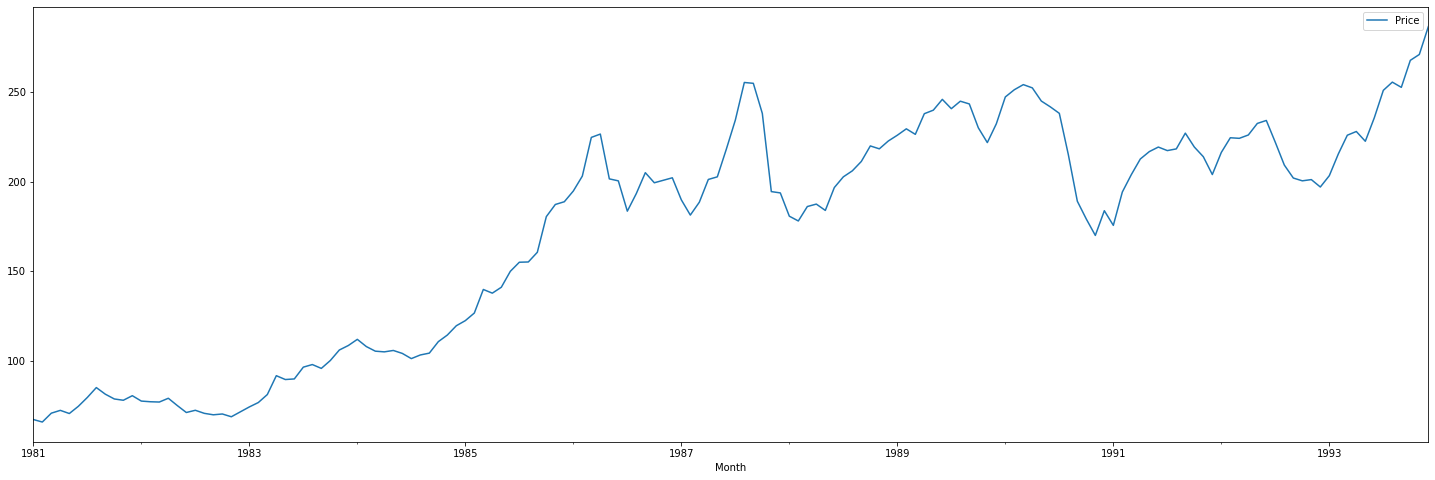

In [ ]:
rcParams['figure.figsize'] = 25,8
df.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

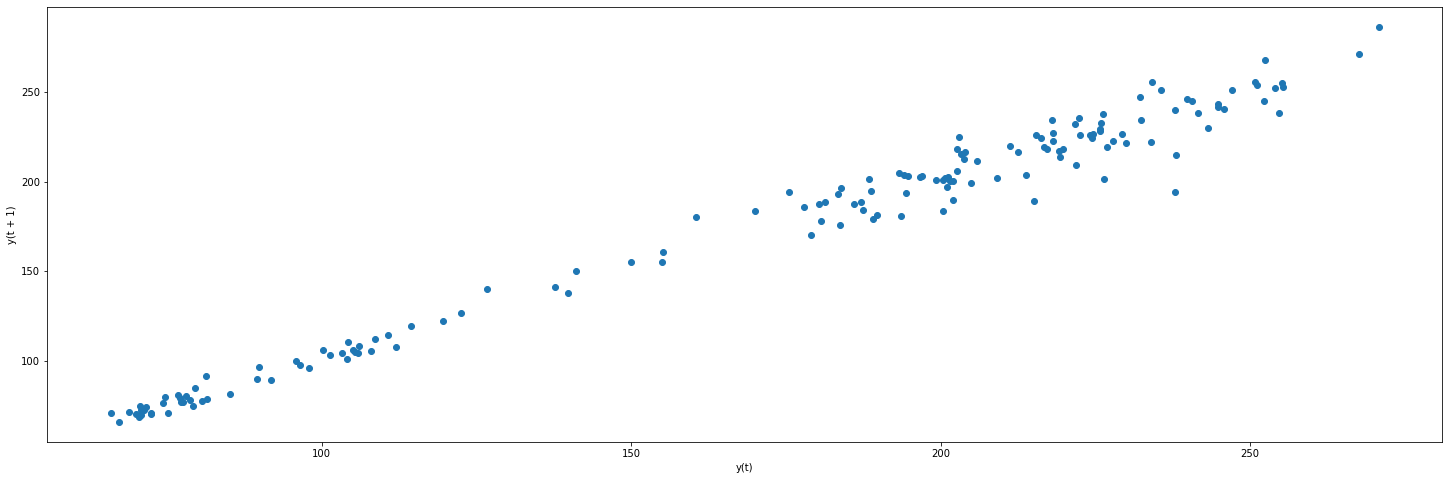

In [ ]:
pd.plotting.lag_plot(df, lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

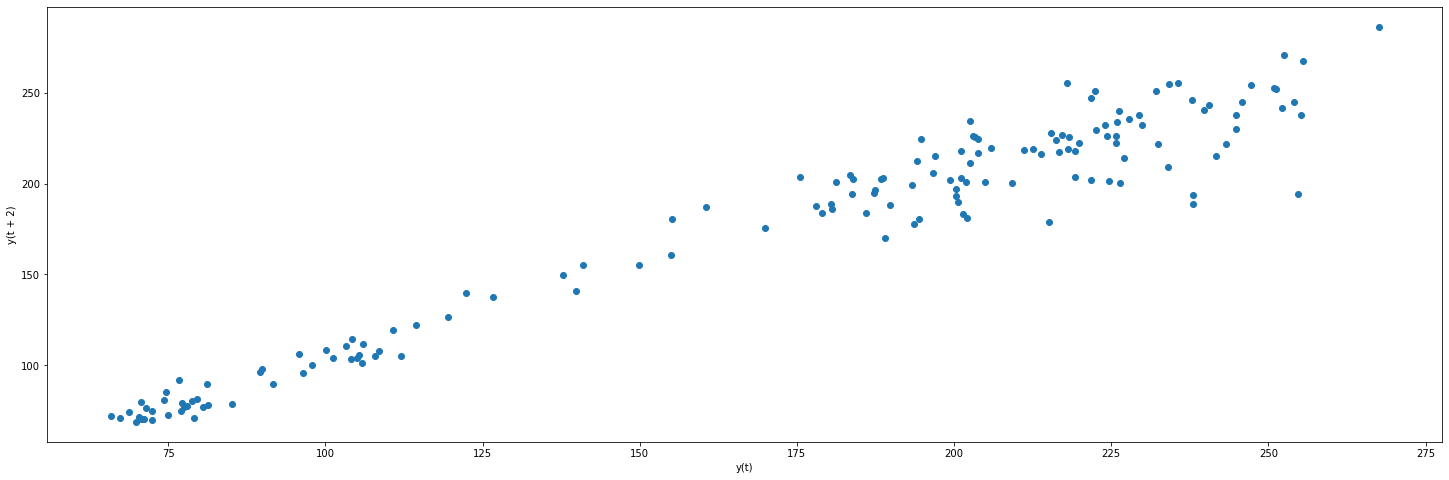

In [ ]:
pd.plotting.lag_plot(df, lag=2)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

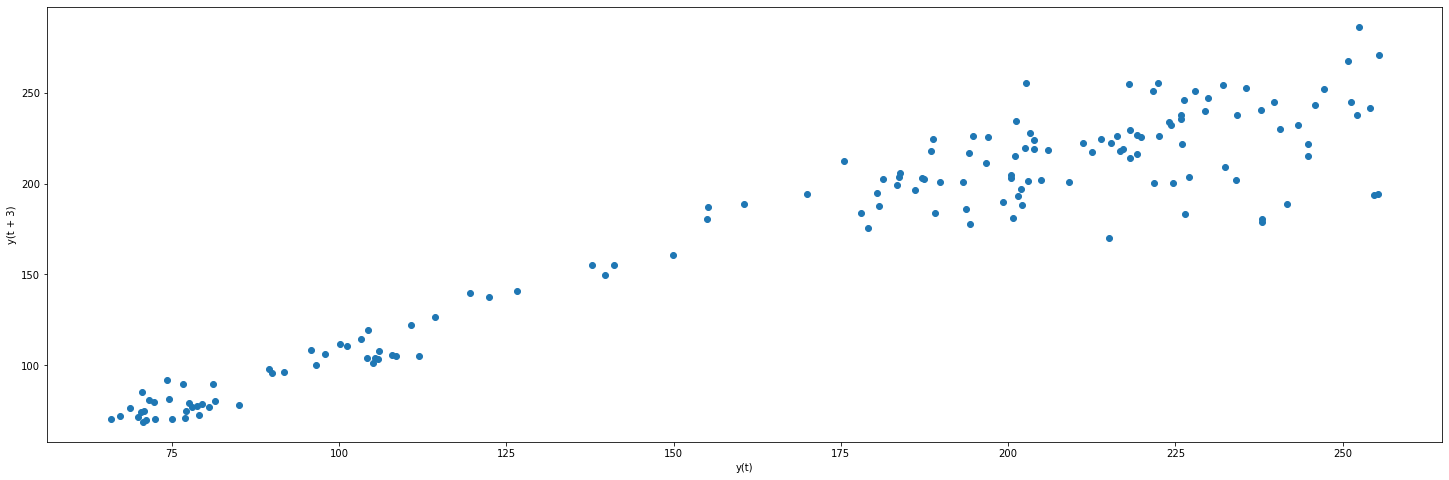

In [ ]:
pd.plotting.lag_plot(df, lag=3)

## ACF anf PACF

### ACF-PACF plot for random process with mean 0 and Std Dev 1

<AxesSubplot:>

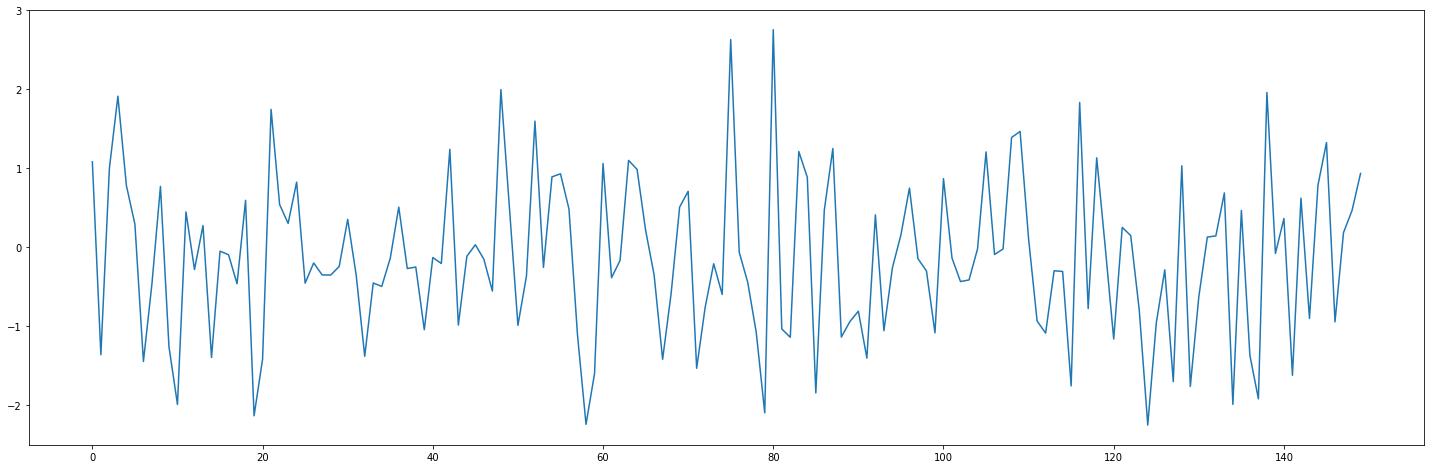

In [ ]:
array = np.random.normal(0,1,150) 
array=pd.Series(array)
array.plot()

In [ ]:
acf(array)

array([ 1.        , -0.0678111 , -0.13587432,  0.02753296, -0.05853519,
        0.03998288, -0.06863603,  0.00394662, -0.05523109,  0.01781327,
        0.04859827, -0.08103219,  0.14401123,  0.00576853,  0.03615122,
       -0.13605435, -0.12695578, -0.03633106, -0.04419828, -0.04839489,
        0.02110485,  0.04749371,  0.04281899, -0.03738504,  0.02613594,
       -0.07744338,  0.04075345,  0.00974164, -0.03916638, -0.09981457,
       -0.00825112,  0.03107069,  0.05181249,  0.05292824,  0.00503784,
        0.02538947, -0.01191089, -0.2046255 ,  0.04181832,  0.08542746,
       -0.00522086])

In [ ]:
pacf(array)

array([ 1.00000000e+00, -6.82662075e-02, -1.43037325e-01,  7.77925019e-03,
       -7.90436691e-02,  3.70847802e-02, -8.87647241e-02,  7.21780735e-03,
       -9.15462425e-02,  2.02194384e-02,  1.84751472e-02, -6.94581069e-02,
        1.46050302e-01,  7.88593788e-03,  9.17189410e-02, -1.72623397e-01,
       -1.19204217e-01, -1.49545321e-01, -6.85858614e-02, -1.44301245e-01,
        1.70954242e-02,  8.23911949e-03,  4.57212912e-02, -5.10029141e-02,
       -4.08055898e-03, -1.28358172e-01,  5.03049535e-03, -6.94088295e-03,
        1.82364227e-02, -1.18613379e-01, -3.49177747e-02, -5.79024337e-02,
        1.33553252e-02,  7.50717007e-04, -4.78624781e-02,  2.53147259e-02,
       -6.13094757e-02, -2.79360551e-01, -4.88416861e-02,  5.55034719e-02,
       -2.19954244e-02])

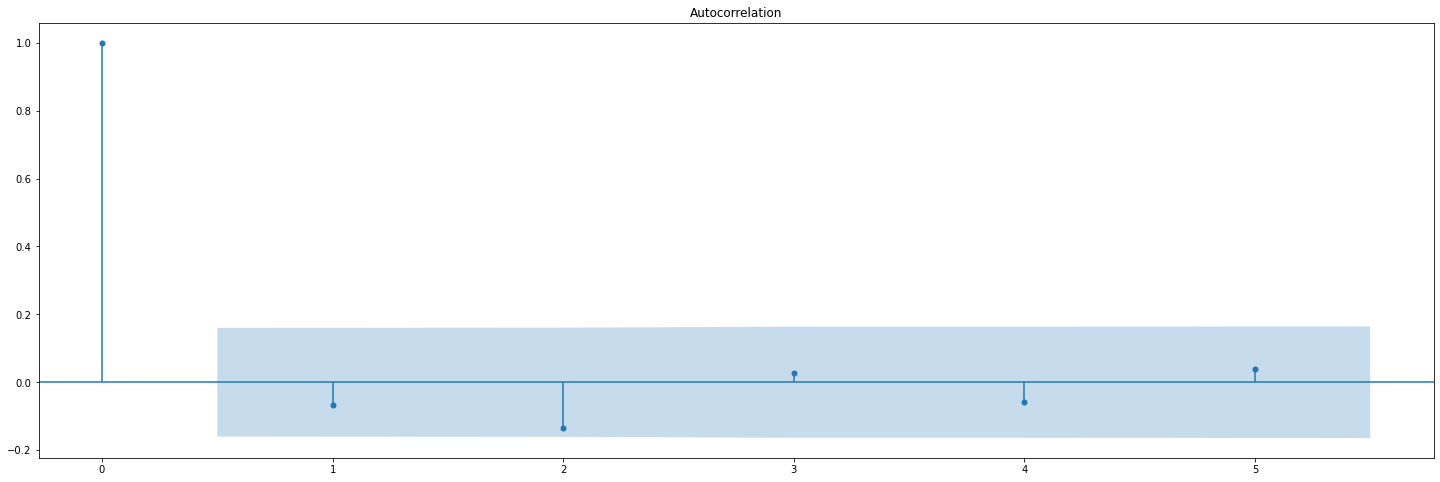

In [ ]:
plot_acf(array,lags=5);

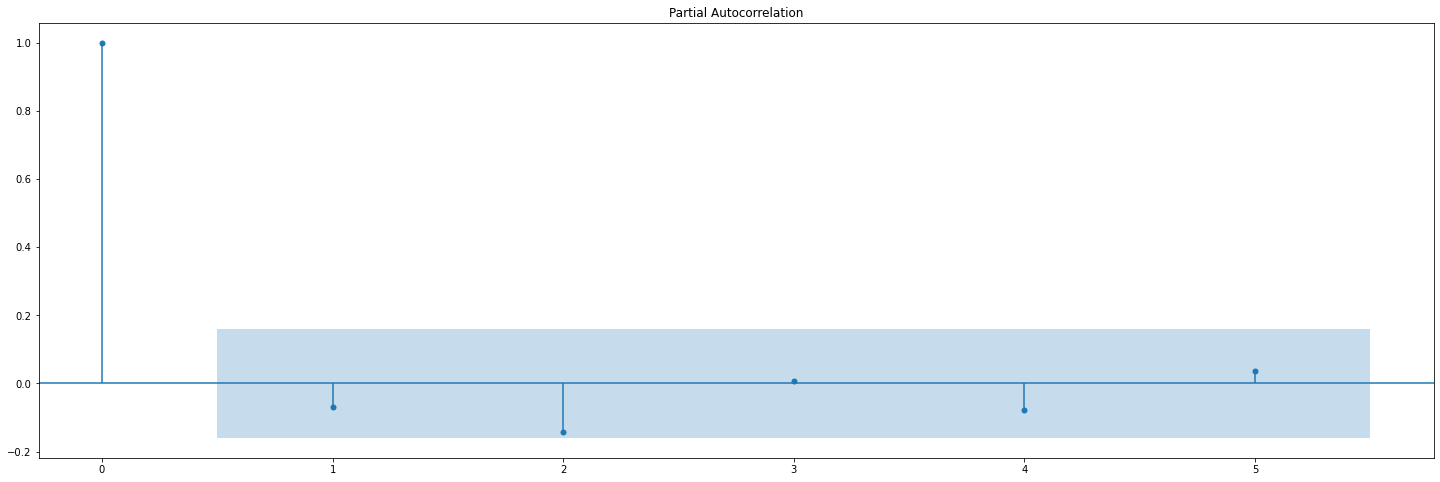

In [ ]:
plot_pacf(array,lags=5);

### ACF-PACF plot for series with trend

In [ ]:
df1= pd.read_csv('GDPUS.csv')
df1.head()

,Year,GDP
0,1929,821.8
1,1930,748.9
2,1931,691.3
3,1932,599.7
4,1933,587.1


<AxesSubplot:xlabel='Year'>

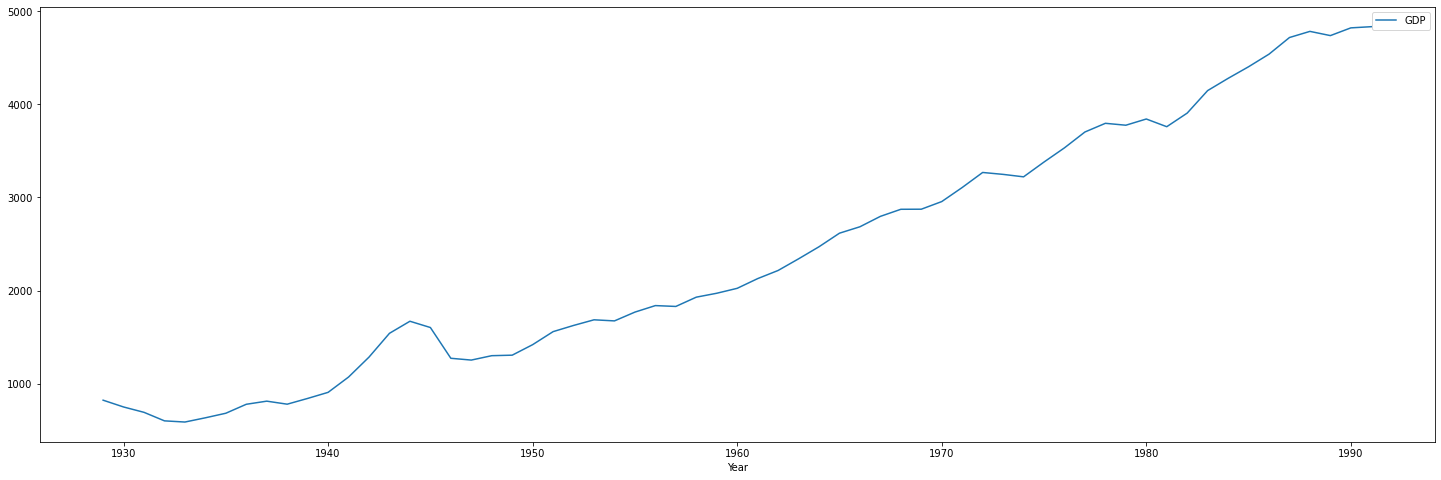

In [ ]:
df1=df1.set_index('Year')
df1.plot()

In [ ]:
acf(df1,nlags=20)

array([1.        , 0.95767063, 0.90994842, 0.86070238, 0.8073258 ,
       0.75396626, 0.70349868, 0.65473443, 0.60719985, 0.55974926,
       0.51531969, 0.47320066, 0.42813631, 0.38489791, 0.34223893,
       0.30302088, 0.26699204, 0.23121882, 0.19266056, 0.15197129,
       0.10971482])

In [ ]:
pacf(df1,nlags=20)

array([ 1.        ,  0.97311693, -0.13524322, -0.05484616, -0.1172637 ,
       -0.02595638,  0.01941432, -0.01192295, -0.02685853, -0.05968479,
        0.01653998, -0.00572247, -0.12669064, -0.00600269, -0.05571448,
        0.04693534,  0.00921626, -0.07398195, -0.15696142, -0.13087817,
       -0.09784509])

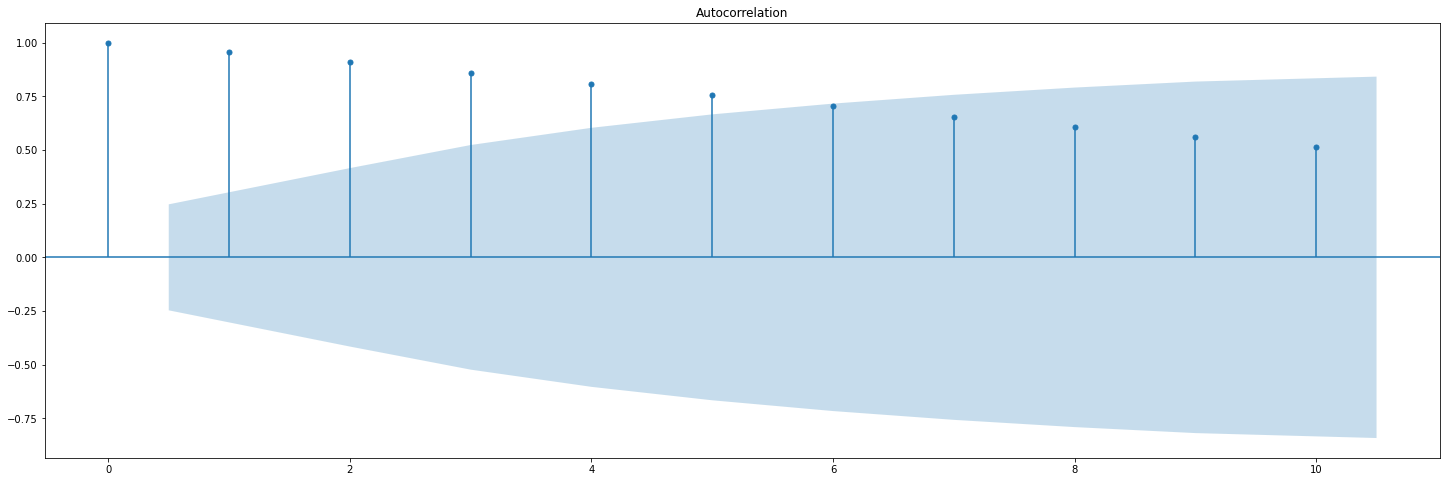

In [ ]:
plot_acf(df1,lags=10);

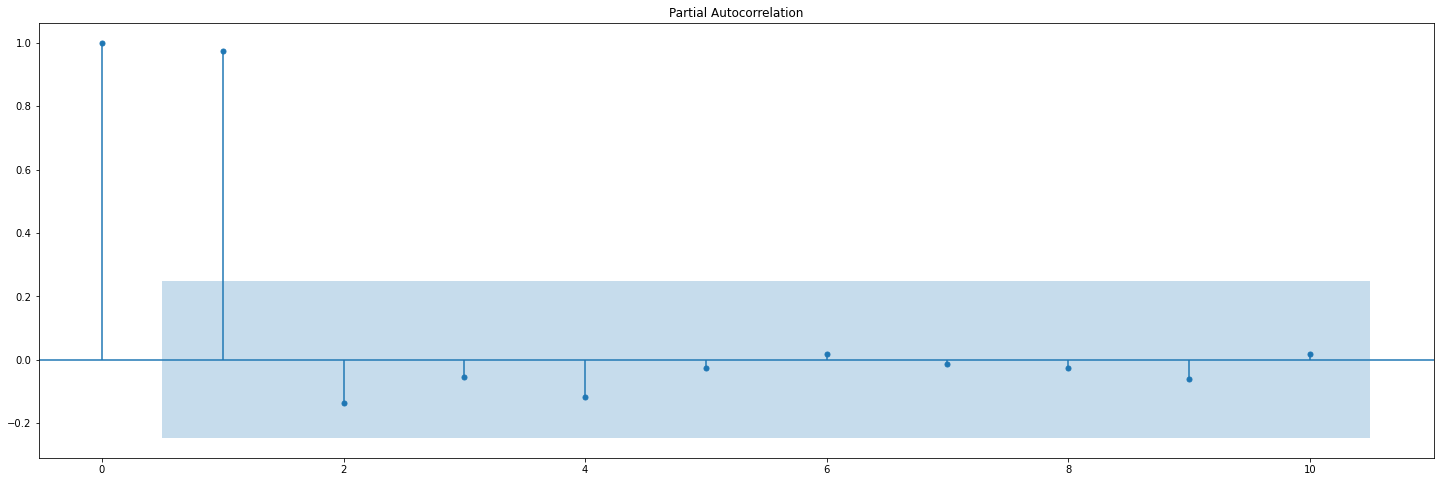

In [ ]:
plot_pacf(df1,lags=10);

### ACF and PACF for seasonal data

In [ ]:
df2= pd.read_csv('AirTemp.csv')
df2.head()

,Year,Month,AvgTemp
0,1920,Jan,40.6
1,1920,Feb,40.8
2,1920,Mar,44.4
3,1920,Apr,46.7
4,1920,May,54.1


In [ ]:
df2.tail()

,Year,Month,AvgTemp
235,1939,Aug,61.8
236,1939,Sep,58.2
237,1939,Oct,46.7
238,1939,Nov,46.6
239,1939,Dec,37.8


In [ ]:
date=pd.date_range(start='01/01/1920',end='31/12/1939',freq='M')

In [ ]:
df2['Month']=date
df2=df2.drop('Year',axis=1)
df2=df2.set_index('Month')

<AxesSubplot:xlabel='Month'>

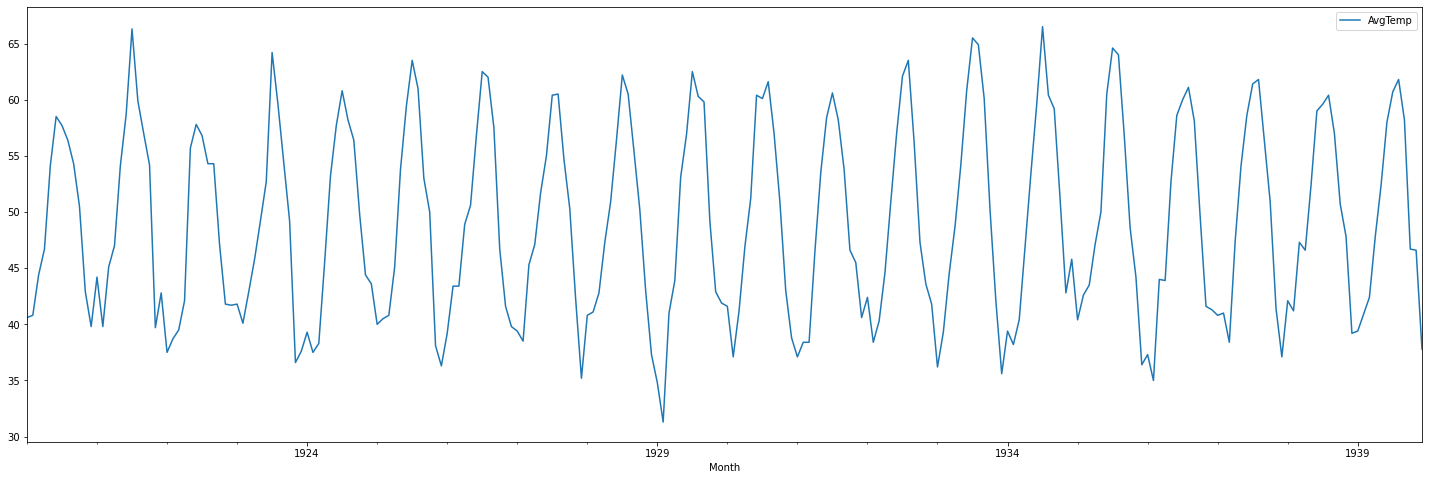

In [ ]:
df2.plot()

In [ ]:
acf(df2)

array([ 1.        ,  0.80790526,  0.45248675, -0.01751263, -0.46420604,
       -0.76994762, -0.87586799, -0.75631615, -0.44503049, -0.01012765,
        0.4287941 ,  0.76499405,  0.88418607,  0.76992388,  0.43521273,
       -0.01110211, -0.44055642, -0.73441497, -0.84416434, -0.72553741,
       -0.43139643, -0.01523368,  0.41976175,  0.73227741,  0.8660013 ,
        0.7274997 ,  0.40601206, -0.02150236, -0.43011936, -0.71382109,
       -0.79664795, -0.6866535 , -0.40649436, -0.01605604,  0.38012585,
        0.69100116,  0.8097235 ,  0.70242215,  0.39449846, -0.00218798,
       -0.40009647])

In [ ]:
pacf(df2)

array([ 1.        ,  0.81128562, -0.59065522, -0.57230108, -0.38994045,
       -0.23943022, -0.28545341, -0.27998011, -0.21257999,  0.0131737 ,
        0.14094934,  0.31502474,  0.21896989,  0.25542659,  0.05184143,
       -0.06315817, -0.08001226,  0.03759164, -0.18472002, -0.12794006,
       -0.23702625, -0.06083874,  0.22273062,  0.22081597,  0.51347757,
        0.16349955,  0.03036024, -0.20450648, -0.4756613 , -0.90449509,
       -6.09840056,  1.13090207,  0.89330965,  4.64842046, -1.22270799,
       -0.54471989, -0.32306872, -0.18700824, -0.0381359 ,  0.35999596,
        0.29658174])

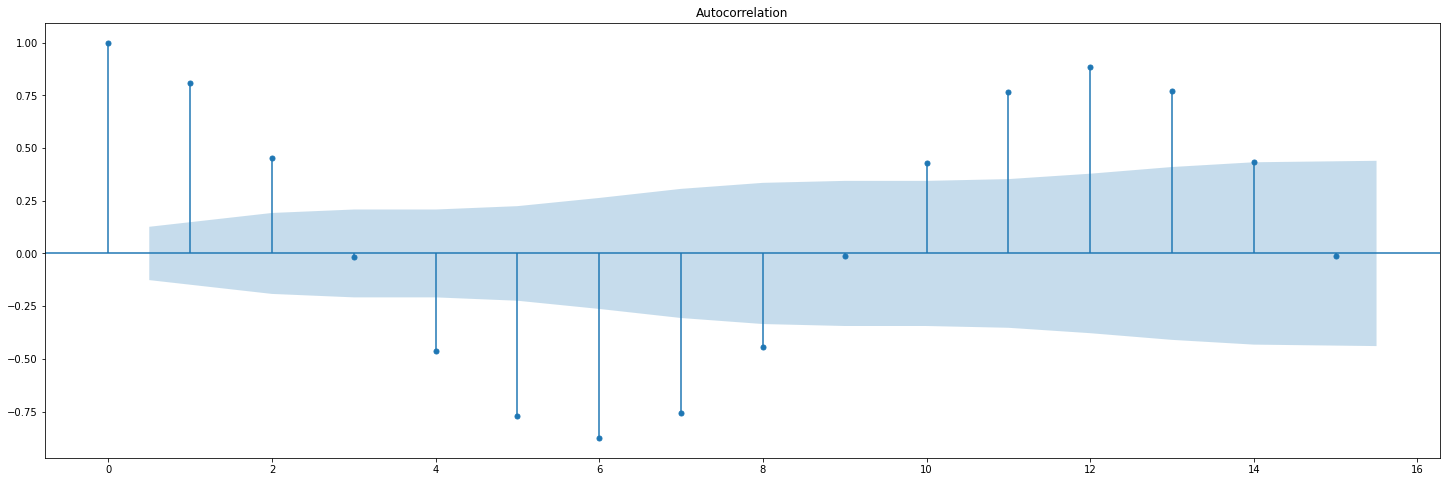

In [ ]:
plot_acf(df2,lags=15);

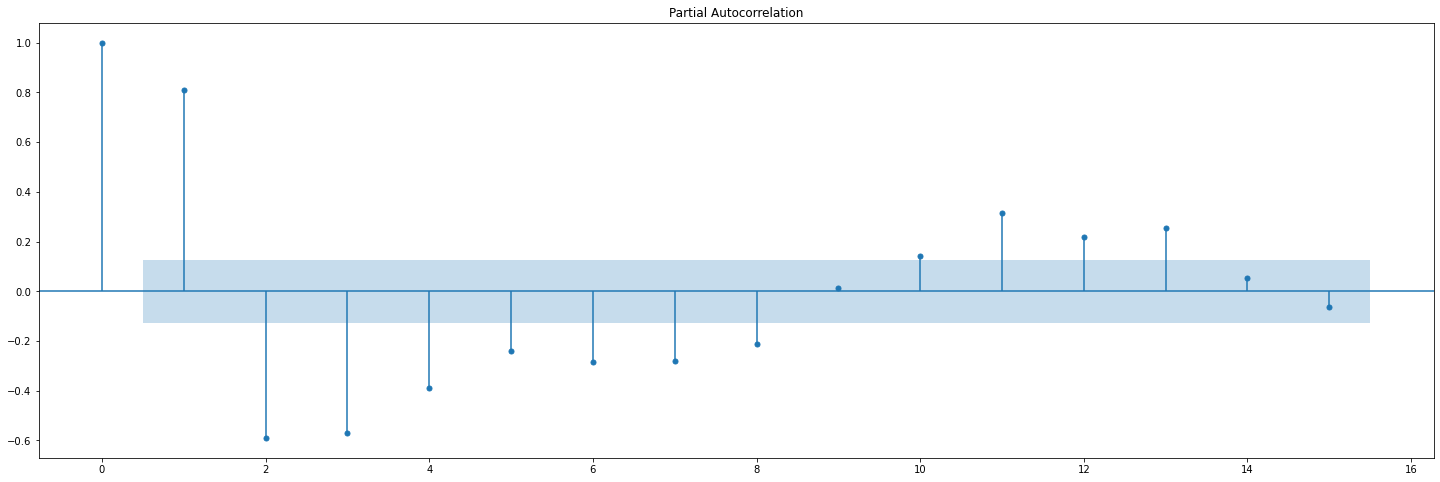

In [ ]:
plot_pacf(df2,lags=15);

### ACF and PACF for series with trend and seasonality

In [ ]:
df3=pd.read_csv('champagne.csv')
df3.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [ ]:
df3.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [ ]:
date=pd.date_range(start='01/01/1964',end='30/9/1972',freq='M')

In [ ]:
df3['Month']=date
df3=df3.set_index('Month')

<AxesSubplot:xlabel='Month'>

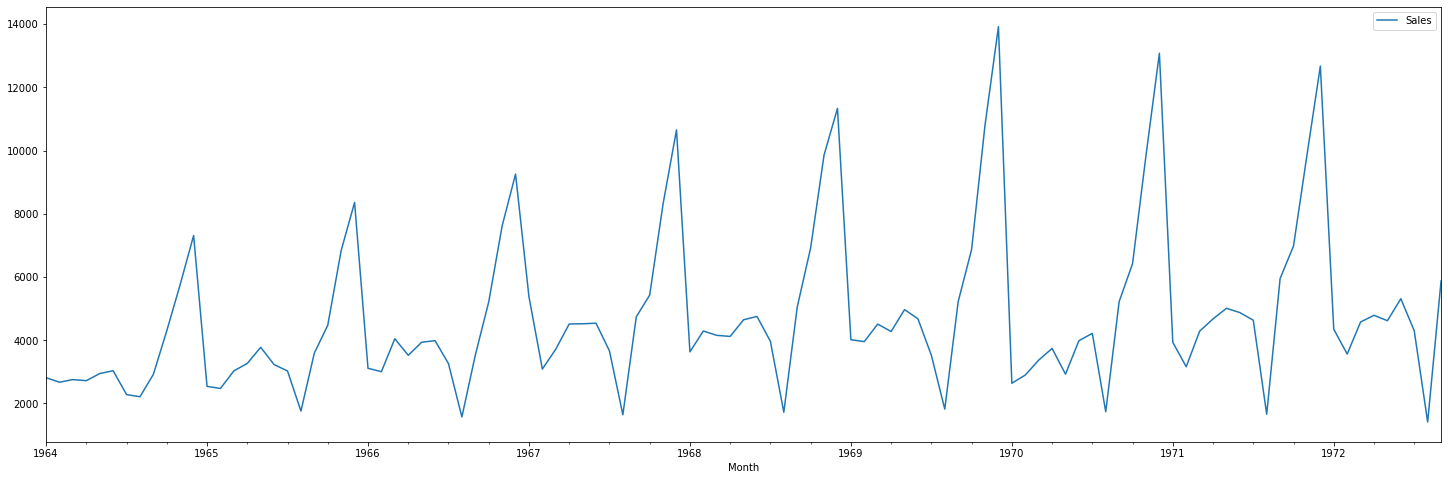

In [ ]:
df3.plot()

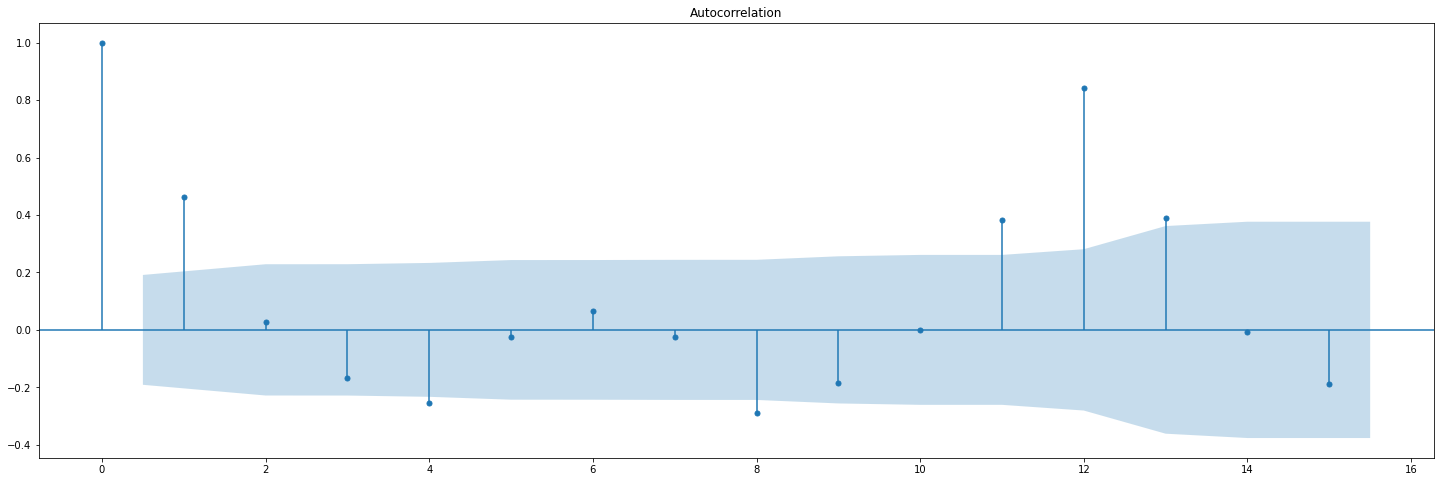

In [ ]:
plot_acf(df3,lags=15);

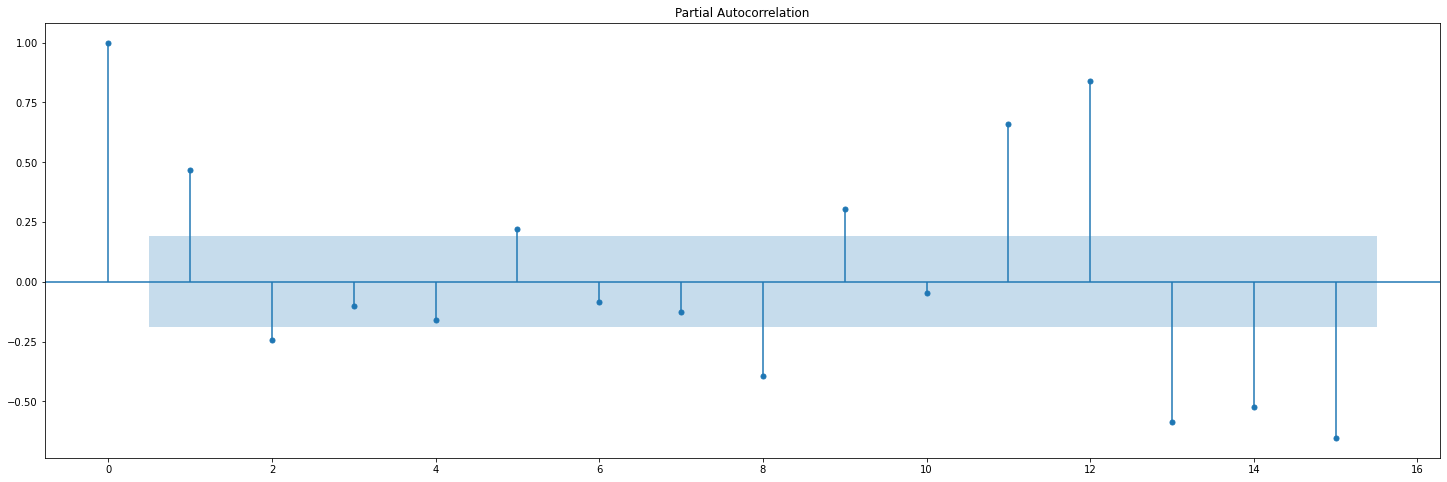

In [ ]:
plot_pacf(df3,lags=15);

### ACF and PACF for series with trend and multiplicative seasonality

In [ ]:
df4 = pd.read_csv('AirPassenger.csv',parse_dates=True,index_col = 'Year-Month')
df4.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Year-Month'>

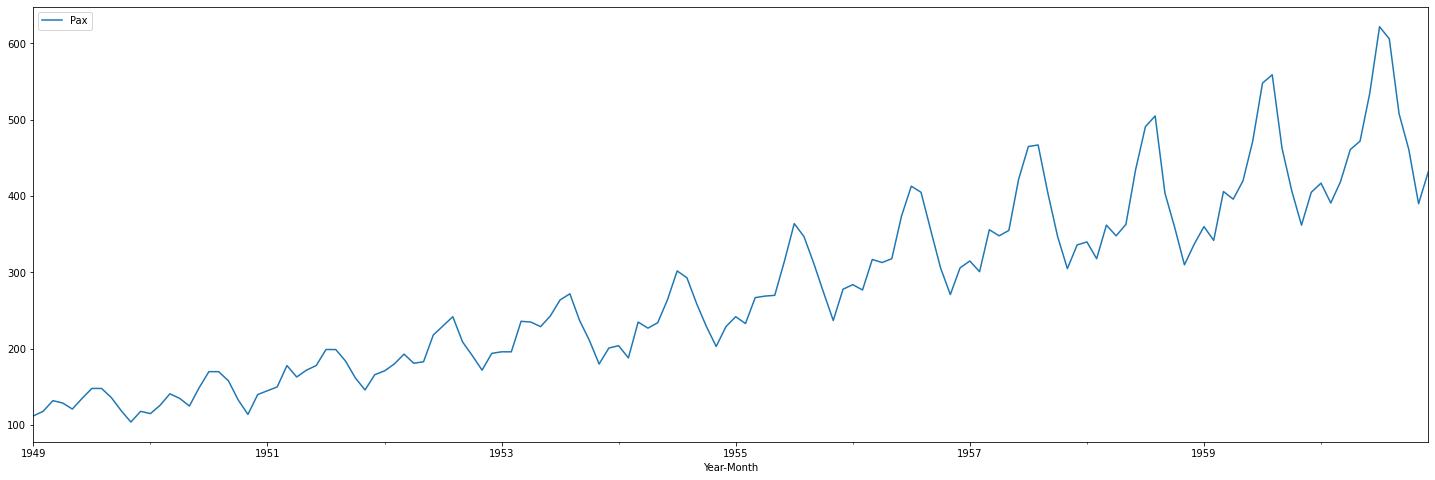

In [ ]:
df4.plot()

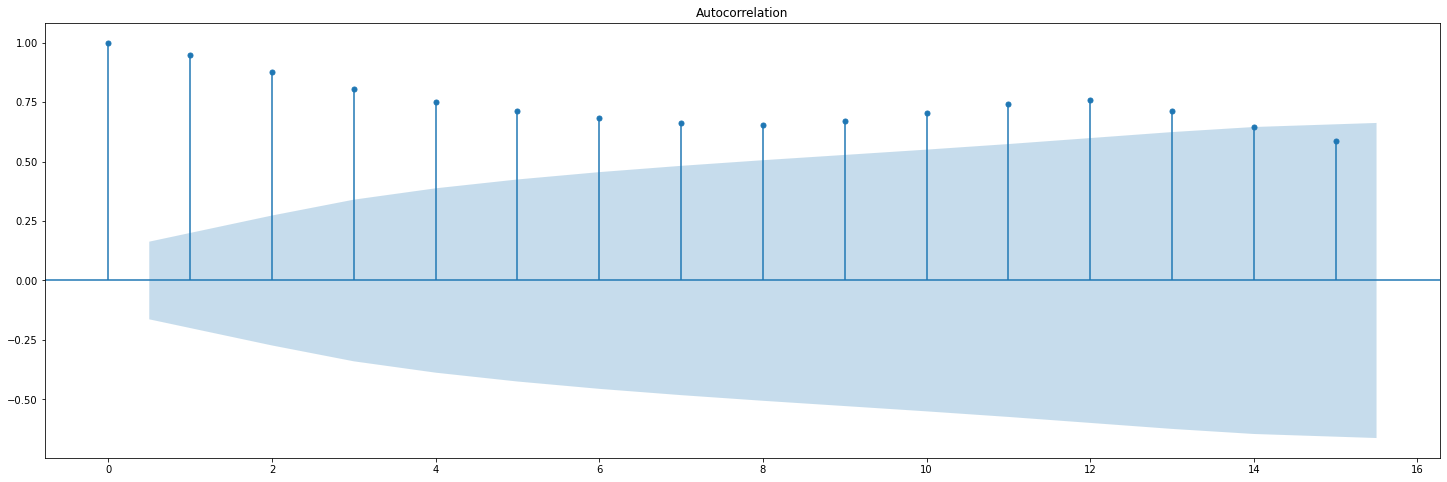

In [ ]:
plot_acf(df4,lags=15);

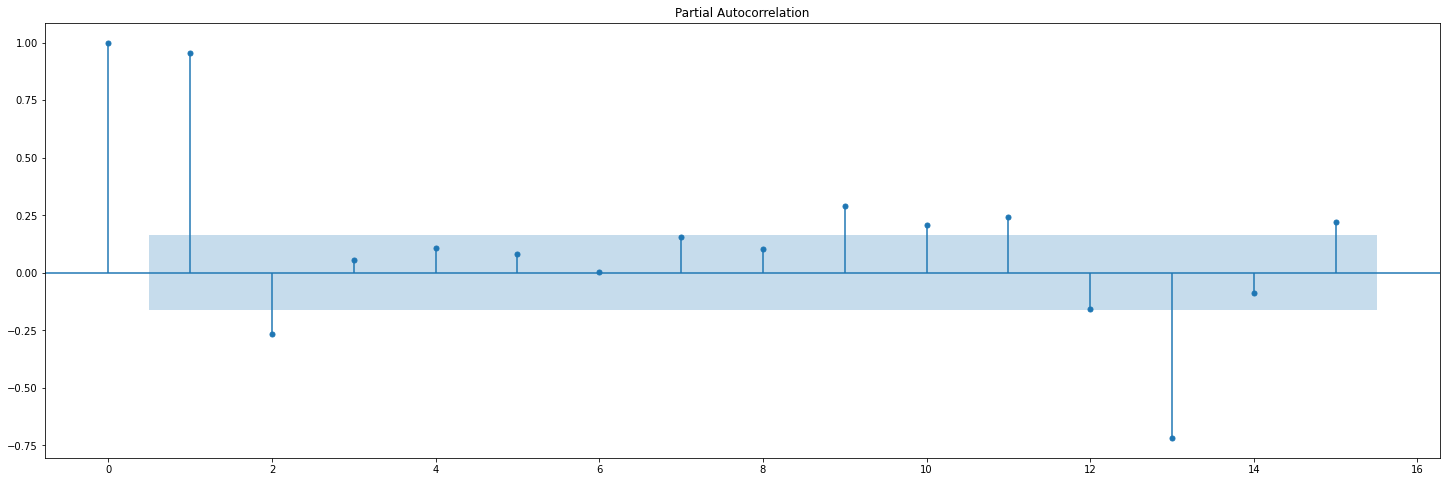

In [ ]:
plot_pacf(df4,lags=15);

## Differencing

## 1st order Differencing

In [ ]:
df_1=df.diff().dropna()

<AxesSubplot:title={'center':'1st oder differencing'}, xlabel='Month'>

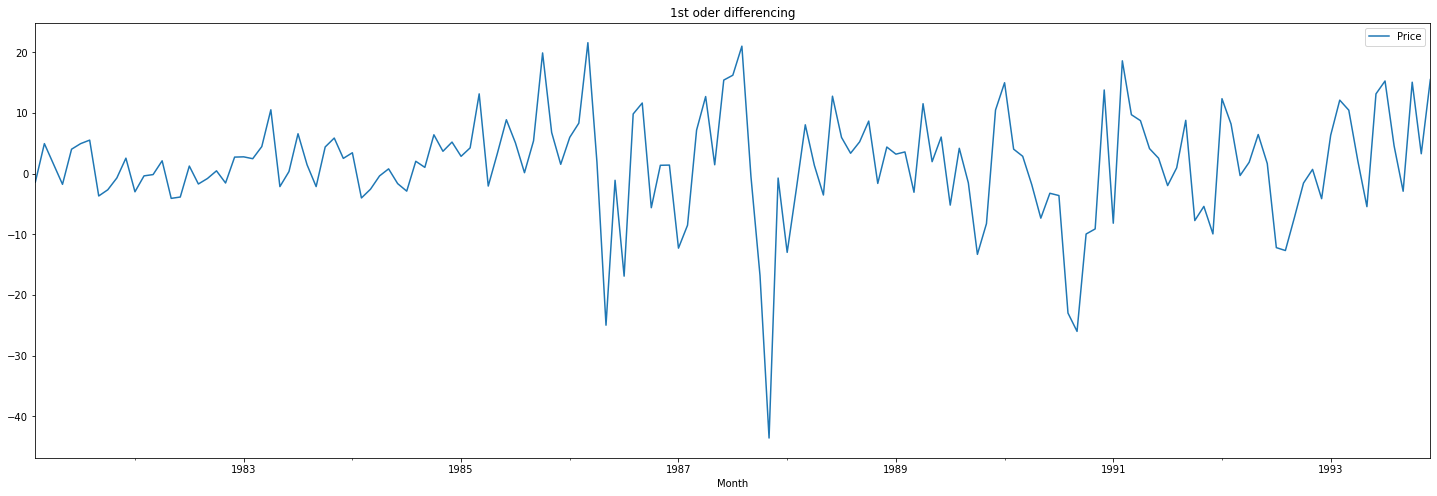

In [ ]:
df_1.plot(title='1st oder differencing')

## Seasonal differencing

<AxesSubplot:xlabel='Month'>

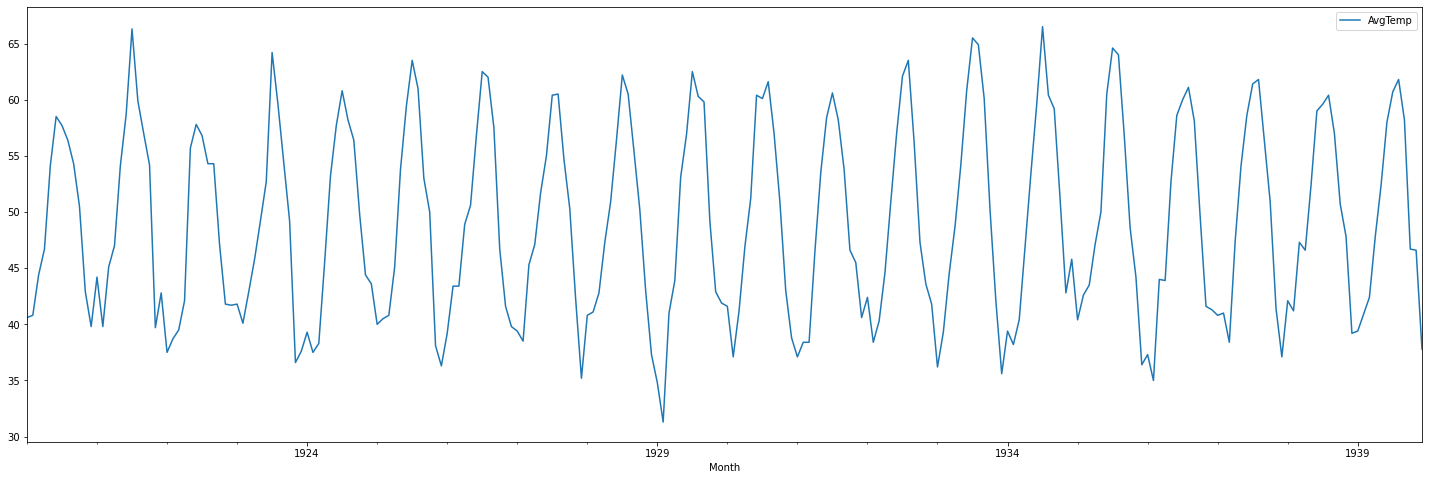

In [ ]:
df2.plot()

In [ ]:
df2_12=df2.diff(periods=12).dropna()

<AxesSubplot:xlabel='Month'>

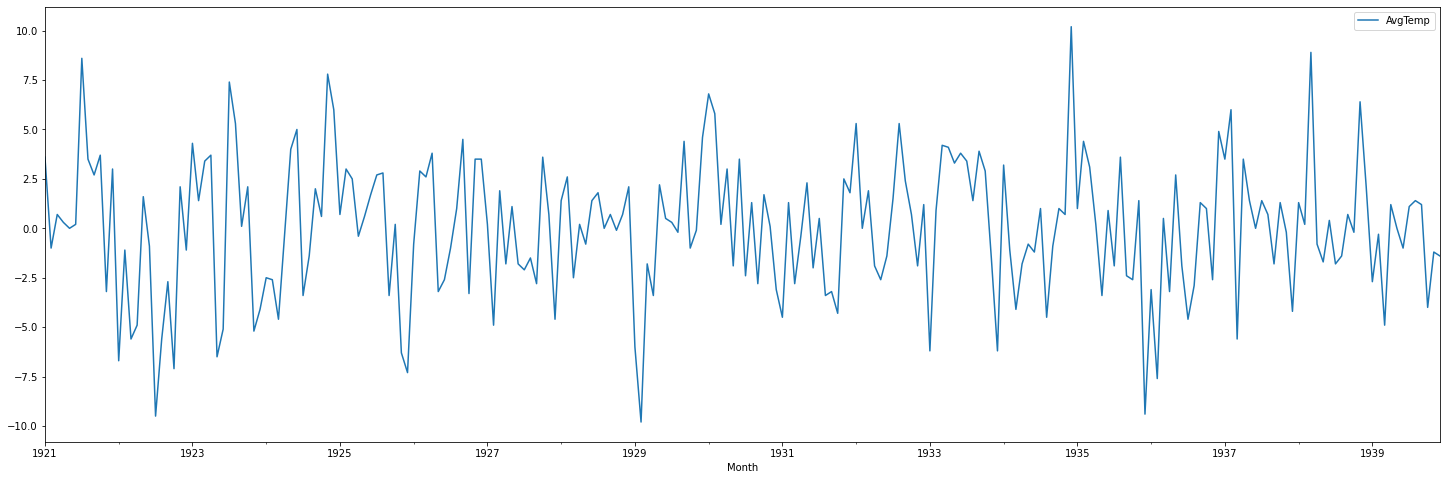

In [ ]:
df2_12.plot()

<AxesSubplot:xlabel='Year-Month'>

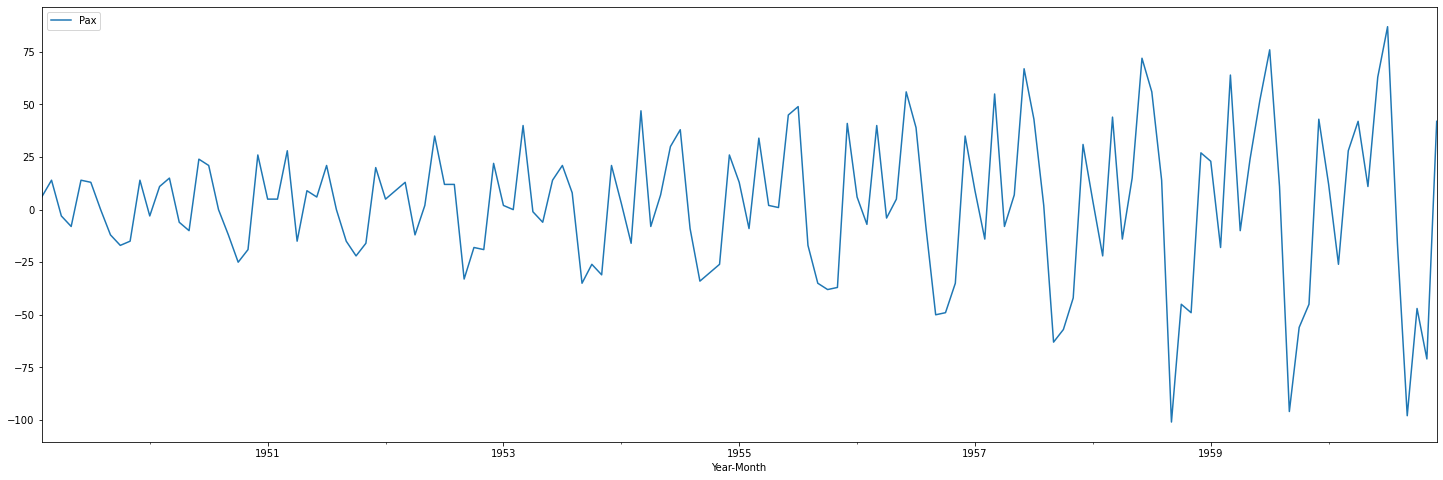

In [ ]:
df4_1=df4.diff(periods=1).dropna()
df4_1.plot()

<AxesSubplot:xlabel='Year-Month'>

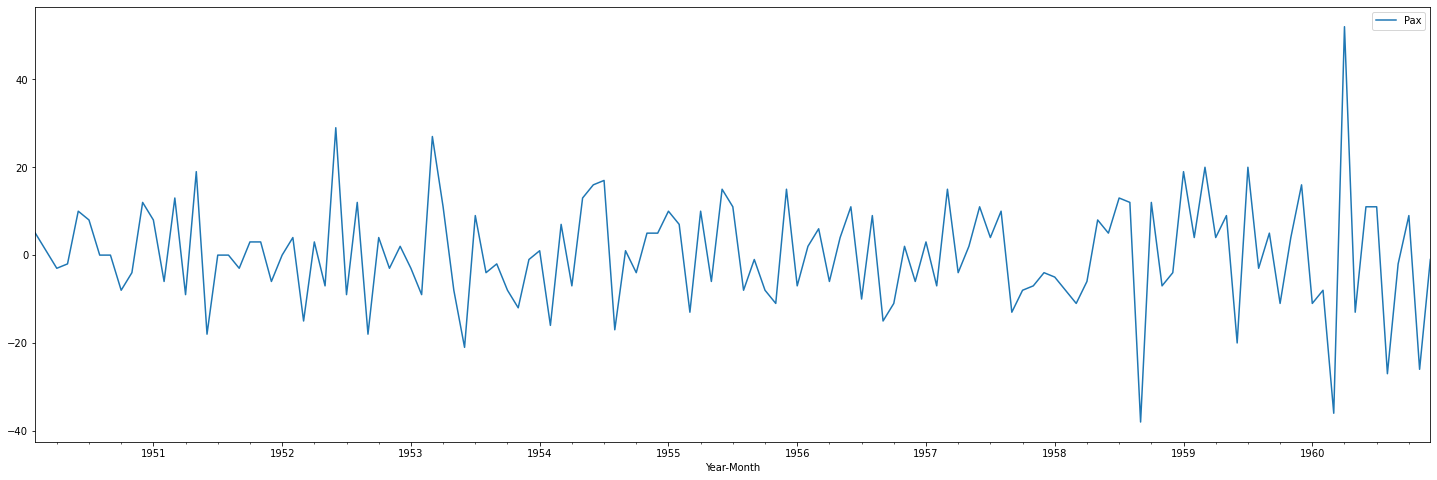

In [ ]:
df4_12=df4_1.diff(periods=12).dropna()
df4_12.plot()